# Pandas 

In [1]:
%load_ext watermark

In [2]:
%watermark -a "E. Kaan Ulgen" -p numpy,scipy,matplotlib,pandas

E. Kaan Ulgen 

numpy 1.16.2
scipy 1.2.0
matplotlib 3.1.0
pandas 1.0.4


In [3]:
from IPython.display import Image
%matplotlib inline

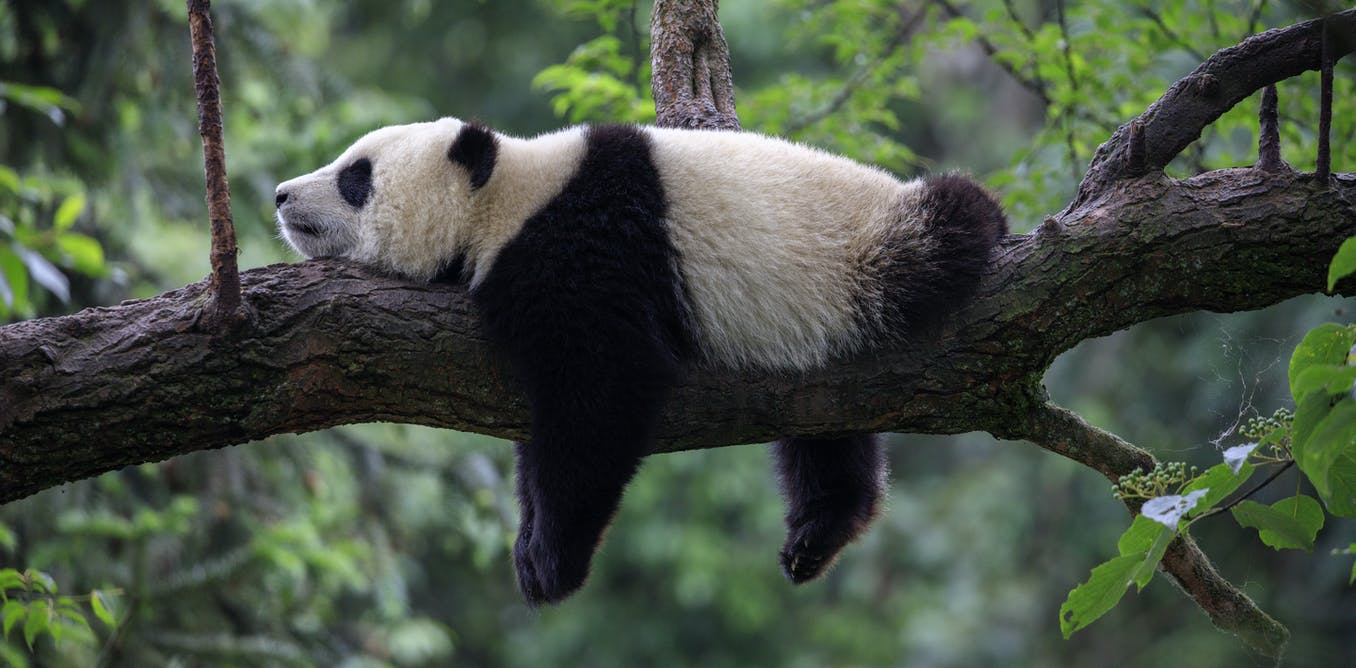

In [4]:
Image(filename='./pandas.jpg', width=400)

## 1.1 Temel Özellikler

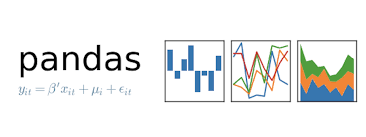

In [5]:
Image(filename='./pandas.png', width=400)

- Günümüzde veri analizi için kullanılan en güçlü araçlardandır. Numpy ve Matplotlib kütüphaneleri üzerine kurulur.
- Dezavantajı, kütüphanenin paralel programlama alt yapısı desteklemiyor olmasıdır. Dolayısıyla yapacağınız işlemlerin performansı makinanızın gücüyle doğru orantılıdır.
- İki temel veri yapısı sunar:
    - Veri Çerçevesi (DataFrame)
    - Seri (Series)    
- Seriler, tek boyutlu diziler şeklinde verilerin tutulması ve üzerlerinde işlem yapılmasını sağlar.
- Veri Çerçeveleri ise 2 boyutlu olarak da tablo yapısını barındırır. 
- Veriler üzerinde kolayca filtreleme yapılabilir, tablo biçimi değiştirilebilir.
- Birçok veri formatı desteklenmektedir. Örneğin, csv, excel, json, ascii ...
- Eksik değerleri doldurmak ve çıkarmak için yöntemler mevcut.
- Farklı türlerde grafikler çizdirilebilir.
- Groupby fonksiyonu sayesinde veri gruplara bölünebilir. 

### 1.1.1 Veri Çerçevesi (DataFrame)

In [6]:
import pandas
pandas.__version__

'1.0.4'

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- **Veri Çerçevesi Oluşturmak**

In [27]:
col = ['isim', 'yas', 'cinsiyet', 'meslek']
df1 = pd.DataFrame([['ahmet', 19, "E", "Ogrenci"], ['Ayse', 26, "K", "Ogrenci"]], columns=col)
print(df1)

    isim  yas cinsiyet   meslek
0  ahmet   19        E  Ogrenci
1   Ayse   26        K  Ogrenci


In [28]:
df1.head() #ilk 5 satır

,isim,yas,cinsiyet,meslek
0,ahmet,19,E,Ogrenci
1,Ayse,26,K,Ogrenci


In [29]:
df1.tail() #son 5 satır

,isim,yas,cinsiyet,meslek
0,ahmet,19,E,Ogrenci
1,Ayse,26,K,Ogrenci


In [30]:
df2 = pd.DataFrame([['Kemal', 22, "E", "Ogrenci"], ['Elif', 58, "K", "Yonetici"]], columns=col)
df2.head()

,isim,yas,cinsiyet,meslek
0,Kemal,22,E,Ogrenci
1,Elif,58,K,Yonetici


In [31]:
df3 = pd.DataFrame(dict(isim=['Mehmet', 'Ebru'], yas=[33, 44], cinsiyet=['E', 'K'], meslek=['Muhendis', 'Avukat']))
df3.head()

,isim,yas,cinsiyet,meslek
0,Mehmet,33,E,Muhendis
1,Ebru,44,K,Avukat


- **Veri Çevrelerinin Birleştirilmesi**
    - Concatenate
    - Join 

   - **Concatenate**

In [32]:
df1.append(df2)

,isim,yas,cinsiyet,meslek
0,ahmet,19,E,Ogrenci
1,Ayse,26,K,Ogrenci
0,Kemal,22,E,Ogrenci
1,Elif,58,K,Yonetici


In [33]:
df1

,isim,yas,cinsiyet,meslek
0,ahmet,19,E,Ogrenci
1,Ayse,26,K,Ogrenci


In [34]:
df = pd.concat([df1, df2, df3])
df.head(6)

,isim,yas,cinsiyet,meslek
0,ahmet,19,E,Ogrenci
1,Ayse,26,K,Ogrenci
0,Kemal,22,E,Ogrenci
1,Elif,58,K,Yonetici
0,Mehmet,33,E,Muhendis
1,Ebru,44,K,Avukat


   - **Join**

In [35]:
df4 = pd.DataFrame(dict(isim=["Mehmet", "Ebru", "Kemal", "ahmet"], boy=[175, 165, 180, 172]))
df4.head()

,isim,boy
0,Mehmet,175
1,Ebru,165
2,Kemal,180
3,ahmet,172


In [36]:
merge = pd.merge(df, df4, on="isim", how="inner")
merge.head()

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172
1,Kemal,22,E,Ogrenci,180
2,Mehmet,33,E,Muhendis,175
3,Ebru,44,K,Avukat,165


In [37]:
df = pd.merge(df, df4, on="isim", how="outer")
df.head(10)

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0
1,Ayse,26,K,Ogrenci,NaN
2,Kemal,22,E,Ogrenci,180.0
3,Elif,58,K,Yonetici,NaN
4,Mehmet,33,E,Muhendis,175.0
5,Ebru,44,K,Avukat,165.0


In [38]:
pd.merge?

Signature:
pd.merge(
    left,
    right,
    how: str = 'inner',
    on=None,
    left_on=None,
    right_on=None,
    left_index: bool = False,
    right_index: bool = False,
    sort: bool = False,
    suffixes=('_x', '_y'),
    copy: bool = True,
    indicator: bool = False,
    validate=None,
) -> 'DataFrame'
Docstring:
Merge DataFrame or named Series objects with a database-style join.

The join is done on columns or indexes. If joining columns on
columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
on indexes or indexes on a column or columns, the index will be passed on.

Parameters
----------
left : DataFrame
right : DataFrame or named Series
    Object to merge with.
how : {'left', 'right', 'outer', 'inner'}, default 'inner'
    Type of merge to be performed.

    * left: use only keys from left frame, similar to a SQL left outer join;
      preserve key order.
    * right: use only keys from right frame, similar to a SQL right outer join;
      pres

- **Özetleme**

In [39]:
type(df)

pandas.core.frame.DataFrame

In [40]:
df.head(10) #İlk 5 Satır

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0
1,Ayse,26,K,Ogrenci,NaN
2,Kemal,22,E,Ogrenci,180.0
3,Elif,58,K,Yonetici,NaN
4,Mehmet,33,E,Muhendis,175.0
5,Ebru,44,K,Avukat,165.0


In [41]:
df.tail() #Son 5 Satır

,isim,yas,cinsiyet,meslek,boy
1,Ayse,26,K,Ogrenci,NaN
2,Kemal,22,E,Ogrenci,180.0
3,Elif,58,K,Yonetici,NaN
4,Mehmet,33,E,Muhendis,175.0
5,Ebru,44,K,Avukat,165.0


In [42]:
df.index

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [43]:
df.columns #Kolon/Sütun isimleri

Index(['isim', 'yas', 'cinsiyet', 'meslek', 'boy'], dtype='object')

In [44]:
df.dtypes #Herbir kolonun veri tipi

isim         object
yas           int64
cinsiyet     object
meslek       object
boy         float64
dtype: object

In [45]:
df.shape #Veri çerçevesinin satır ve sütun sayısı

(6, 5)

In [46]:
df.values 

array([['ahmet', 19, 'E', 'Ogrenci', 172.0],
       ['Ayse', 26, 'K', 'Ogrenci', nan],
       ['Kemal', 22, 'E', 'Ogrenci', 180.0],
       ['Elif', 58, 'K', 'Yonetici', nan],
       ['Mehmet', 33, 'E', 'Muhendis', 175.0],
       ['Ebru', 44, 'K', 'Avukat', 165.0]], dtype=object)

In [47]:
df.info() # Kısa Özet

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      6 non-null      object 
 1   yas       6 non-null      int64  
 2   cinsiyet  6 non-null      object 
 3   meslek    6 non-null      object 
 4   boy       4 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 288.0+ bytes


In [48]:
df.describe() #Temel istatiksel sonuçlar

,yas,boy
count,6.000000,4.000000
mean,33.666667,173.000000
std,14.895189,6.271629
min,19.000000,165.000000
25%,23.000000,170.250000
50%,29.500000,173.500000
75%,41.250000,176.250000
max,58.000000,180.000000


In [49]:
df.describe().T #temel istatiksel sonuçların transpoze edilmiş gösterimi

,count,mean,std,min,25%,50%,75%,max
yas,6.0,33.666667,14.895189,19.0,23.00,29.5,41.25,58.0
boy,4.0,173.000000,6.271629,165.0,170.25,173.5,176.25,180.0


- **Kolon Seçimi**

In [50]:
df["isim"]

0     ahmet
1      Ayse
2     Kemal
3      Elif
4    Mehmet
5      Ebru
Name: isim, dtype: object

In [51]:
df.isim

0     ahmet
1      Ayse
2     Kemal
3      Elif
4    Mehmet
5      Ebru
Name: isim, dtype: object

In [52]:
df[["isim","meslek","boy"]]

,isim,meslek,boy
0,ahmet,Ogrenci,172.0
1,Ayse,Ogrenci,NaN
2,Kemal,Ogrenci,180.0
3,Elif,Yonetici,NaN
4,Mehmet,Muhendis,175.0
5,Ebru,Avukat,165.0


- **Satır Seçimi**
    - iloc, ix (eski versiyonlarda mevcut, 1.0.0 itibaren kaldırıldı)

  - iloc

In [53]:
df2 = df.copy()

In [54]:
df2.iloc[0] #İlk Satır

isim          ahmet
yas              19
cinsiyet          E
meslek      Ogrenci
boy             172
Name: 0, dtype: object

In [55]:
df2.iloc[0, 0] #İlk satır, ilk değer

'ahmet'

In [56]:
df2.head()

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0
1,Ayse,26,K,Ogrenci,NaN
2,Kemal,22,E,Ogrenci,180.0
3,Elif,58,K,Yonetici,NaN
4,Mehmet,33,E,Muhendis,175.0


In [57]:
df2.iloc[0, 1] = 55

In [58]:
df2

,isim,yas,cinsiyet,meslek,boy
0,ahmet,55,E,Ogrenci,172.0
1,Ayse,26,K,Ogrenci,NaN
2,Kemal,22,E,Ogrenci,180.0
3,Elif,58,K,Yonetici,NaN
4,Mehmet,33,E,Muhendis,175.0
5,Ebru,44,K,Avukat,165.0


In [59]:
df2.shape[0]

6

In [60]:
for i in range(df.shape[0]):
    row = df2.iloc[i]
    row.yas *= 100
    print(row)
df2.head()

isim          ahmet
yas            5500
cinsiyet          E
meslek      Ogrenci
boy             172
Name: 0, dtype: object
isim           Ayse
yas            2600
cinsiyet          K
meslek      Ogrenci
boy             NaN
Name: 1, dtype: object
isim          Kemal
yas            2200
cinsiyet          E
meslek      Ogrenci
boy             180
Name: 2, dtype: object
isim            Elif
yas             5800
cinsiyet           K
meslek      Yonetici
boy              NaN
Name: 3, dtype: object
isim          Mehmet
yas             3300
cinsiyet           E
meslek      Muhendis
boy              175
Name: 4, dtype: object
isim          Ebru
yas           4400
cinsiyet         K
meslek      Avukat
boy            165
Name: 5, dtype: object


/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,isim,yas,cinsiyet,meslek,boy
0,ahmet,55,E,Ogrenci,172.0
1,Ayse,26,K,Ogrenci,NaN
2,Kemal,22,E,Ogrenci,180.0
3,Elif,58,K,Yonetici,NaN
4,Mehmet,33,E,Muhendis,175.0


In [61]:
df.head()

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0
1,Ayse,26,K,Ogrenci,NaN
2,Kemal,22,E,Ogrenci,180.0
3,Elif,58,K,Yonetici,NaN
4,Mehmet,33,E,Muhendis,175.0


- **Satır Seçimi/Filtreleme**

In [62]:
df[df.yas<20]

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0


In [63]:
df[df.yas<20][["isim","meslek","boy"]]

,isim,meslek,boy
0,ahmet,Ogrenci,172.0


In [64]:
df[(df.yas>20) & (df.cinsiyet=="E")]

,isim,yas,cinsiyet,meslek,boy
2,Kemal,22,E,Ogrenci,180.0
4,Mehmet,33,E,Muhendis,175.0


In [65]:
df[df.meslek.isin(["Ogrenci","Muhendis"])]

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0
1,Ayse,26,K,Ogrenci,NaN
2,Kemal,22,E,Ogrenci,180.0
4,Mehmet,33,E,Muhendis,175.0


- **Sıralama**

In [66]:
df3 = df.copy()

In [67]:
df3.yas.sort_values()

0    19
2    22
1    26
4    33
5    44
3    58
Name: yas, dtype: int64

In [68]:
df3.sort_values(by="yas")

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0
2,Kemal,22,E,Ogrenci,180.0
1,Ayse,26,K,Ogrenci,NaN
4,Mehmet,33,E,Muhendis,175.0
5,Ebru,44,K,Avukat,165.0
3,Elif,58,K,Yonetici,NaN


In [69]:
df3.sort_values(by="yas", ascending=False)

,isim,yas,cinsiyet,meslek,boy
3,Elif,58,K,Yonetici,NaN
5,Ebru,44,K,Avukat,165.0
4,Mehmet,33,E,Muhendis,175.0
1,Ayse,26,K,Ogrenci,NaN
2,Kemal,22,E,Ogrenci,180.0
0,ahmet,19,E,Ogrenci,172.0


In [70]:
df3.sort_values(by=["meslek", "yas"])

,isim,yas,cinsiyet,meslek,boy
5,Ebru,44,K,Avukat,165.0
4,Mehmet,33,E,Muhendis,175.0
0,ahmet,19,E,Ogrenci,172.0
2,Kemal,22,E,Ogrenci,180.0
1,Ayse,26,K,Ogrenci,NaN
3,Elif,58,K,Yonetici,NaN


In [71]:
df3.head(6)

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0
1,Ayse,26,K,Ogrenci,NaN
2,Kemal,22,E,Ogrenci,180.0
3,Elif,58,K,Yonetici,NaN
4,Mehmet,33,E,Muhendis,175.0
5,Ebru,44,K,Avukat,165.0


In [72]:
df3.sort_values(by="yas", inplace=True)
df3.head(6)

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0
2,Kemal,22,E,Ogrenci,180.0
1,Ayse,26,K,Ogrenci,NaN
4,Mehmet,33,E,Muhendis,175.0
5,Ebru,44,K,Avukat,165.0
3,Elif,58,K,Yonetici,NaN


- **Tanımlayıcı İstatistikler**

In [73]:
df3.describe()

,yas,boy
count,6.000000,4.000000
mean,33.666667,173.000000
std,14.895189,6.271629
min,19.000000,165.000000
25%,23.000000,170.250000
50%,29.500000,173.500000
75%,41.250000,176.250000
max,58.000000,180.000000


In [74]:
df3.describe(include="all")

,isim,yas,cinsiyet,meslek,boy
count,6,6.000000,6,6,4.000000
unique,6,NaN,2,4,NaN
top,Ebru,NaN,E,Ogrenci,NaN
freq,1,NaN,3,3,NaN
mean,NaN,33.666667,NaN,NaN,173.000000
std,NaN,14.895189,NaN,NaN,6.271629
min,NaN,19.000000,NaN,NaN,165.000000
25%,NaN,23.000000,NaN,NaN,170.250000
50%,NaN,29.500000,NaN,NaN,173.500000
75%,NaN,41.250000,NaN,NaN,176.250000


In [75]:
df3.groupby("meslek")["yas"].mean()

meslek
Avukat      44.000000
Muhendis    33.000000
Ogrenci     22.333333
Yonetici    58.000000
Name: yas, dtype: float64

In [76]:
df3.groupby("meslek")["yas"].median()

meslek
Avukat      44
Muhendis    33
Ogrenci     22
Yonetici    58
Name: yas, dtype: int64

In [77]:
veri = {
'İsim':["Mehmet", "Ebru", "Bekir", "Can", "Cansu", "Kaan", "Süleyman", "Oğuz","Ayşe","Umit"],
'Yaş':[22,23,22,21,25,26,22,21,20,22],  'Basvuru':["Adalet","Fizik","Fizik","Hukuk","Hemşire","İnşaat","Bilgisayar","İstatistik","Matematik","Biyoloji"],
'SınavSonuc':[45,50,30,20,95,100,79,82,63,38],
'Tecrube(yıl)':[0,1,1,None,3,4,0,None,None,2]}
df_ = pd.DataFrame(veri)
df_.head(10)

,İsim,Yaş,Basvuru,SınavSonuc,Tecrube(yıl)
0,Mehmet,22,Adalet,45,0.0
1,Ebru,23,Fizik,50,1.0
2,Bekir,22,Fizik,30,1.0
3,Can,21,Hukuk,20,NaN
4,Cansu,25,Hemşire,95,3.0
5,Kaan,26,İnşaat,100,4.0
6,Süleyman,22,Bilgisayar,79,0.0
7,Oğuz,21,İstatistik,82,NaN
8,Ayşe,20,Matematik,63,NaN
9,Umit,22,Biyoloji,38,2.0


In [78]:
df_.describe().T

,count,mean,std,min,25%,50%,75%,max
Yaş,10.0,22.400000,1.837873,20.0,21.25,22.0,22.75,26.0
SınavSonuc,10.0,60.200000,27.863955,20.0,39.75,56.5,81.25,100.0
Tecrube(yıl),7.0,1.571429,1.511858,0.0,0.50,1.0,2.50,4.0


In [79]:
df_.corr() #Korelasyon Matrisi

,Yaş,SınavSonuc,Tecrube(yıl)
Yaş,1.000000,0.577573,0.883184
SınavSonuc,0.577573,1.000000,0.598001
Tecrube(yıl),0.883184,0.598001,1.000000


- **Ayrık Verilerin Dışlanması**

In [12]:
np.random.seed(1)
df_outlier = pd.DataFrame({'Data':np.random.normal(size=200)})
df_outlier.head()

,Data
0,1.624345
1,-0.611756
2,-0.528172
3,-1.072969
4,0.865408


In [13]:
df_outlier.describe()

,Data
count,200.000000
mean,0.106689
std,0.912330
min,-2.434838
25%,-0.461463
50%,0.129761
75%,0.708663
max,2.528326


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1236b1ef0>]],
      dtype=object)

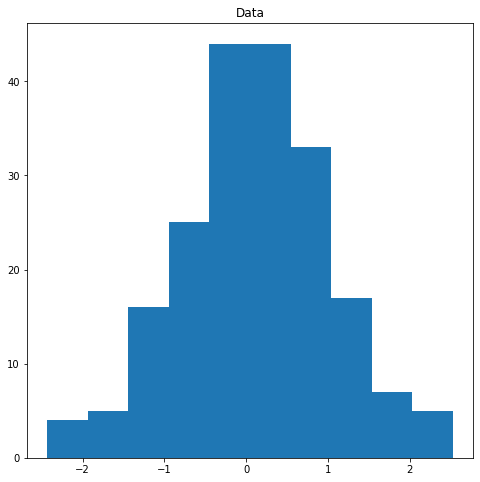

In [20]:
df_outlier.hist(grid=False,figsize=(8,8),bins=10)

In [16]:
df_outlier.hist?

Signature:
df_outlier.hist(
    column=None,
    by=None,
    grid=True,
    xlabelsize=None,
    xrot=None,
    ylabelsize=None,
    yrot=None,
    ax=None,
    sharex=False,
    sharey=False,
    figsize=None,
    layout=None,
    bins=10,
    backend=None,
    **kwargs,
)
Docstring:
Make a histogram of the DataFrame's.

A `histogram`_ is a representation of the distribution of data.
This function calls :meth:`matplotlib.pyplot.hist`, on each series in
the DataFrame, resulting in one histogram per column.

.. _histogram: https://en.wikipedia.org/wiki/Histogram

Parameters
----------
data : DataFrame
    The pandas object holding the data.
column : str or sequence
    If passed, will be used to limit data to a subset of columns.
by : object, optional
    If passed, then used to form histograms for separate groups.
grid : bool, default True
    Whether to show axis grid lines.
xlabelsize : int, default None
    If specified changes the x-axis label size.
xrot : float, default None
    

In [21]:
Q1 = df_outlier.Data.quantile(0.25)
Q2 = df_outlier.Data.quantile(0.50)
Q3 = df_outlier.Data.quantile(0.75)
IQR = Q3-Q1 #Interquartile Range

In [22]:
print("Q1: ", round(Q1,3))
print("Q2: ", round(Q2,3))
print("Q3: ", round(Q3,3))
print("IQR: ", round(IQR,3))
print("Alt sınır -- Q1-1.5*IQR: ", round((Q1-1.5*IQR),3))
print("Üst sınır -- Q3+1.5*IQR: ", round((Q3+1.5*IQR),3))

Q1:  -0.461
Q2:  0.13
Q3:  0.709
IQR:  1.17
Alt sınır -- Q1-1.5*IQR:  -2.217
Üst sınır -- Q3+1.5*IQR:  2.464


In [23]:
yeni = pd.DataFrame({"Data":[5]}) 
df_outlier2 = df_outlier.append(yeni, ignore_index = True, sort=True)[df_outlier.columns.tolist()]
df_outlier2.tail()

,Data
196,0.602319
197,0.420282
198,0.810952
199,1.044442
200,5.000000


In [24]:
df_outlier2.describe()

,Data
count,201.000000
mean,0.131034
std,0.973299
min,-2.434838
25%,-0.447129
50%,0.137701
75%,0.740556
max,5.000000


In [25]:
df_outlier2[(df_outlier2.Data < (Q1-1.5*IQR))|(df_outlier2.Data > (Q3+1.5*IQR))] #Aykırı Değerler - Outlier

,Data
5,-2.301539
151,-2.434838
172,2.528326
200,5.000000


In [26]:
len(df_outlier2[(df_outlier2.Data > (Q1-1.5*IQR))&(df_outlier2.Data < Q3+1.5*IQR)]) #Aykırı Değerler Olmayanların Sayısı

197

- *Tekrarlı Verilerin Silinmesi*

In [80]:
df.head(10)

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0
1,Ayse,26,K,Ogrenci,NaN
2,Kemal,22,E,Ogrenci,180.0
3,Elif,58,K,Yonetici,NaN
4,Mehmet,33,E,Muhendis,175.0
5,Ebru,44,K,Avukat,165.0


In [81]:
df4 = df.append(df.iloc[0], ignore_index=True)
df4.head(10)

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0
1,Ayse,26,K,Ogrenci,NaN
2,Kemal,22,E,Ogrenci,180.0
3,Elif,58,K,Yonetici,NaN
4,Mehmet,33,E,Muhendis,175.0
5,Ebru,44,K,Avukat,165.0
6,ahmet,19,E,Ogrenci,172.0


In [82]:
df4.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [83]:
df4.duplicated().sum()

1

In [84]:
df4[df4.duplicated()]

,isim,yas,cinsiyet,meslek,boy
6,ahmet,19,E,Ogrenci,172.0


In [85]:
df4.yas.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
Name: yas, dtype: bool

In [86]:
df4.duplicated(["yas","cinsiyet"]).sum()

1

- **Kayıp Veriler**

In [87]:
df5 = df.copy()

In [88]:
df5.head(10)

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0
1,Ayse,26,K,Ogrenci,NaN
2,Kemal,22,E,Ogrenci,180.0
3,Elif,58,K,Yonetici,NaN
4,Mehmet,33,E,Muhendis,175.0
5,Ebru,44,K,Avukat,165.0


In [89]:
df5.describe(include="all")

,isim,yas,cinsiyet,meslek,boy
count,6,6.000000,6,6,4.000000
unique,6,NaN,2,4,NaN
top,Ebru,NaN,E,Ogrenci,NaN
freq,1,NaN,3,3,NaN
mean,NaN,33.666667,NaN,NaN,173.000000
std,NaN,14.895189,NaN,NaN,6.271629
min,NaN,19.000000,NaN,NaN,165.000000
25%,NaN,23.000000,NaN,NaN,170.250000
50%,NaN,29.500000,NaN,NaN,173.500000
75%,NaN,41.250000,NaN,NaN,176.250000


In [90]:
df5.boy.isnull()

0    False
1     True
2    False
3     True
4    False
5    False
Name: boy, dtype: bool

In [91]:
df5.boy.notnull()

0     True
1    False
2     True
3    False
4     True
5     True
Name: boy, dtype: bool

In [92]:
df5.yas.isnull()

0    False
1    False
2    False
3    False
4    False
5    False
Name: yas, dtype: bool

In [93]:
df5[df5.boy.isnull()]

,isim,yas,cinsiyet,meslek,boy
1,Ayse,26,K,Ogrenci,NaN
3,Elif,58,K,Yonetici,NaN


In [94]:
df5.boy.isnull().sum()

2

In [95]:
df5.dropna()

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0
2,Kemal,22,E,Ogrenci,180.0
4,Mehmet,33,E,Muhendis,175.0
5,Ebru,44,K,Avukat,165.0


In [97]:
df5.dropna(how="any") #how="any"

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0
2,Kemal,22,E,Ogrenci,180.0
4,Mehmet,33,E,Muhendis,175.0
5,Ebru,44,K,Avukat,165.0


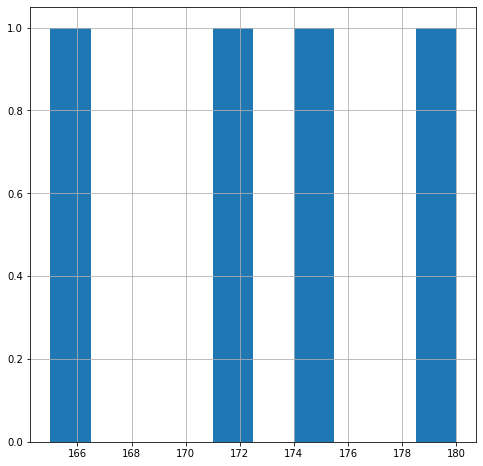

In [98]:
df5.boy.hist(figsize=(8,8))

In [99]:
boy_mean = df5.boy.mean()
boy_mean

173.0

In [102]:
df5.head(10)

,isim,yas,cinsiyet,meslek,boy
0,ahmet,19,E,Ogrenci,172.0
1,Ayse,26,K,Ogrenci,NaN
2,Kemal,22,E,Ogrenci,180.0
3,Elif,58,K,Yonetici,NaN
4,Mehmet,33,E,Muhendis,175.0
5,Ebru,44,K,Avukat,165.0


In [104]:
df5.boy.fillna(df5.boy.mean()) 

0    172.0
1    173.0
2    180.0
3    173.0
4    175.0
5    165.0
Name: boy, dtype: float64

- **Tekrardan İsimlendirme**

In [105]:
df6 = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
df6.head()

,A,B
0,1,4
1,2,5
2,3,6


In [106]:
df6.rename(index={0: "x", 1: "y", 2: "z"})

,A,B
x,1,4
y,2,5
z,3,6


In [107]:
df6.index

RangeIndex(start=0, stop=3, step=1)

In [108]:
df6.rename(index=str).index

Index(['0', '1', '2'], dtype='object')

In [109]:
df6.rename(columns={"A": "x", "B": "y"})

,x,y
0,1,4
1,2,5
2,3,6


In [110]:
df6.rename(str.lower, axis='columns')

,a,b
0,1,4
1,2,5
2,3,6


In [111]:
df6.rename({1: 2, 2: 4}, axis='index')

,A,B
0,1,4
2,2,5
4,3,6


### 1.1.2 Seriler

In [112]:
notlar = [45,50,30,20,95,100,79,82,63,38]
seri = pd.Series(notlar)
seri

0     45
1     50
2     30
3     20
4     95
5    100
6     79
7     82
8     63
9     38
dtype: int64

In [113]:
seri_index = ["Mehmet", "Ebru", "Bekir", "Can", "Cansu", "Kaan", "Süleyman", "Oğuz","Ayşe","Umit"]
seri.index = seri_index
seri.head(10)

Mehmet       45
Ebru         50
Bekir        30
Can          20
Cansu        95
Kaan        100
Süleyman     79
Oğuz         82
Ayşe         63
Umit         38
dtype: int64

- **Sözlük Kullanarak Seri Oluşturma**

In [114]:
i = {'Mehmet':45, 'Ebru':50, 'Bekir':30, 'Can':20, 'Cansu':95, 'Kaan':100, 'Süleyman':79, 'Oğuz':82, 'Ayşe':63, 'Umit':38}
seri2 = pd.Series(i)
seri2.head(10)

Mehmet       45
Ebru         50
Bekir        30
Can          20
Cansu        95
Kaan        100
Süleyman     79
Oğuz         82
Ayşe         63
Umit         38
dtype: int64

In [115]:
# Veri Eklemek
seri2["Ülkü"] = 100
seri2.head(20)

Mehmet       45
Ebru         50
Bekir        30
Can          20
Cansu        95
Kaan        100
Süleyman     79
Oğuz         82
Ayşe         63
Umit         38
Ülkü        100
dtype: int64

In [116]:
yeni = {'Melike':95, 'Ethem':70, 'Aslı':85, 'Enver': np.NaN}
seri3 = seri2.append(pd.Series(yeni))
seri3.head(20)

Mehmet       45.0
Ebru         50.0
Bekir        30.0
Can          20.0
Cansu        95.0
Kaan        100.0
Süleyman     79.0
Oğuz         82.0
Ayşe         63.0
Umit         38.0
Ülkü        100.0
Melike       95.0
Ethem        70.0
Aslı         85.0
Enver         NaN
dtype: float64

In [117]:
seri3.isnull()

Mehmet      False
Ebru        False
Bekir       False
Can         False
Cansu       False
Kaan        False
Süleyman    False
Oğuz        False
Ayşe        False
Umit        False
Ülkü        False
Melike      False
Ethem       False
Aslı        False
Enver        True
dtype: bool

In [118]:
print('Notlar: ', seri3.values)
print('İndeks değerleri: ', seri3.index)

Notlar:  [ 45.  50.  30.  20.  95. 100.  79.  82.  63.  38. 100.  95.  70.  85.
  nan]
İndeks değerleri:  Index(['Mehmet', 'Ebru', 'Bekir', 'Can', 'Cansu', 'Kaan', 'Süleyman', 'Oğuz',
       'Ayşe', 'Umit', 'Ülkü', 'Melike', 'Ethem', 'Aslı', 'Enver'],
      dtype='object')


In [119]:
seri3.name = 'Notlar'
seri3.index.name = 'Ogrenciler'
seri3.head(20)

Ogrenciler
Mehmet       45.0
Ebru         50.0
Bekir        30.0
Can          20.0
Cansu        95.0
Kaan        100.0
Süleyman     79.0
Oğuz         82.0
Ayşe         63.0
Umit         38.0
Ülkü        100.0
Melike       95.0
Ethem        70.0
Aslı         85.0
Enver         NaN
Name: Notlar, dtype: float64

In [120]:
print('Verinin özeti:')
seri3.describe()

Verinin özeti:


count     14.000000
mean      68.000000
std       27.234028
min       20.000000
25%       46.250000
50%       74.500000
75%       92.500000
max      100.000000
Name: Notlar, dtype: float64

In [121]:
# NaN değerin düşürülmesi
seri3.drop('Enver', inplace = True)
seri3.head(20)

Ogrenciler
Mehmet       45.0
Ebru         50.0
Bekir        30.0
Can          20.0
Cansu        95.0
Kaan        100.0
Süleyman     79.0
Oğuz         82.0
Ayşe         63.0
Umit         38.0
Ülkü        100.0
Melike       95.0
Ethem        70.0
Aslı         85.0
Name: Notlar, dtype: float64

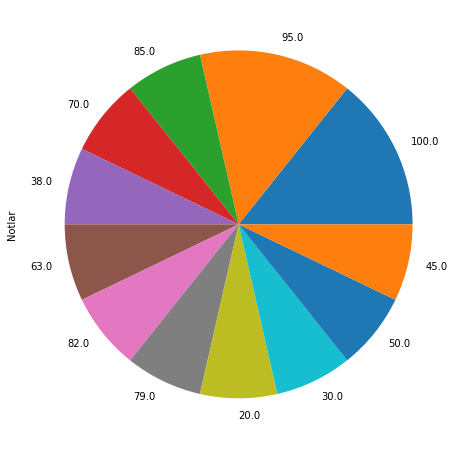

In [122]:
seri3.name = 'Notlar'
plt.figure(figsize= (8,8))
seri3.value_counts().plot(kind = 'pie')
plt.show()

## 1.1.3 Veri Okuma

In [123]:
!more data/table1.cat

x y sigma_y sigma_x rho_xy
203 495 21 5 -0.33
58 173 15 9 0.67
210 479 27 4 -0.02
202 504 14 4 -0.05
198 510 30 11 -0.84
158 416 16 7 -0.69
165 393 14 5 0.30
201 442 25 5 -0.46
157 317 52 5 -0.03
131 311 16 6 0.50
166 400 34 6 0.73
160 337 31 5 -0.52
186 423 42 9 0.90
125 334 26 8 0.40
218 533 16 6 -0.78
146 344 22 5 -0.56
>able1.cat (END)

In [124]:
data = pd.read_csv("./data/table1.cat", delim_whitespace=True)
data.head()

,x,y,sigma_y,sigma_x,rho_xy
0,203,495,21,5,-0.33
1,58,173,15,9,0.67
2,210,479,27,4,-0.02
3,202,504,14,4,-0.05
4,198,510,30,11,-0.84


In [125]:
data = pd.read_table('./data/table1.cat',  delim_whitespace=True)
data.head()

,x,y,sigma_y,sigma_x,rho_xy
0,203,495,21,5,-0.33
1,58,173,15,9,0.67
2,210,479,27,4,-0.02
3,202,504,14,4,-0.05
4,198,510,30,11,-0.84


## Alıştırmalar

**1. Alıştırma**
- Kaynak: https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/
- Aşağıdaki 1. alıştırma Jose Portilla'nın dersinden alınmıştır. 

In [ ]:
import pandas as pd

- **salaries.csv verisi sal olarak okutulsun (dataframe)** 

In [ ]:
sal = pd.read_csv("./data/Salaries.csv")
sal.head()

- **info() metodu kullanarak dataframe hakkında gerekli bilgileri edinin. Kaç satır? Kaç Kolon?**

In [ ]:
sal.info()

- **Ortalama BasePay ne kadar?**

In [ ]:
sal["BasePay"].mean()

- **Veri setindeki en yüksek OvertimePay değeri ne kadar?**

In [ ]:
sal["OvertimePay"].max()

- **JOSEPH DRISCOLL adındaki çalışanın iş bilgisi?**

In [ ]:
sal[sal["EmployeeName"] == "JOSEPH DRISCOLL"]['JobTitle']

- **JOSEPH DRISCOLL ne kadar kazanıyor?**

In [ ]:
sal[sal['EmployeeName']=='JOSEPH DRISCOLL']['TotalPayBenefits']

- **En yüksek maaşı alan kişiyi belirle**

In [ ]:
sal[sal['TotalPayBenefits']== sal['TotalPayBenefits'].max()]

- **En düşük maaşı alan kişi kimdir?**

In [ ]:
sal[sal['TotalPayBenefits']== sal['TotalPayBenefits'].min()]

- **Tüm Çalışanların 2011-2014 yılları arasındaki ortalama (Taban Ücretleri) Base Pay miktarı ne kadar?**

In [ ]:
sal.groupby('Year').mean()['BasePay']

- **Kaç tane benzersiz iş var?**

In [ ]:
sal['JobTitle'].nunique()

- **En yaygın 5 iş?**

In [ ]:
sal['JobTitle'].value_counts().head(5)

**2. Alıştırma**

In [ ]:
import pandas as pd

In [ ]:
movies = pd.read_excel('./data/movies.xls', sheet_name=None)

In [ ]:
movies.keys()

In [ ]:
movies

In [ ]:
movies1 = pd.read_excel('./data/movies.xls', sheet_name=0)
movies1.head()

In [ ]:
movies1.info()

In [ ]:
movies1.describe(include="all").T

In [ ]:
movies1[["Language","Title"]]

In [ ]:
movies1["Language"].value_counts()

In [ ]:
movies1["Language"].value_counts().plot(kind='bar', figsize=(8,8))

In [ ]:
movies1["Country"].value_counts()

In [ ]:
movies1["Country"].value_counts().plot(kind='bar', figsize=(8,8))

In [ ]:
movies1["Genres"].value_counts()

In [ ]:
movies1["Genres"].value_counts()[:20]

In [ ]:
movies1["Genres"].value_counts()[:20].plot.pie(subplots=True,figsize=(10,10),autopct='%1.1f%%',
                                              legend=True, shadow=True, startangle=0)

In [ ]:
movies1.Director.value_counts()

In [ ]:
ax = movies1.Year.hist(figsize=(8,8), grid=False)
ax.set_xlabel("Yıl", fontsize=15)

In [ ]:
ax = movies1.plot.scatter(x="Budget", y="Gross Earnings", fontsize=15, figsize=(8,8))
ax.set_xlabel("Budget", fontsize=15)
ax.set_ylabel("Gross Earnings", fontsize=15)

In [ ]:
movies1[movies1['Budget'] == movies1['Budget'].max()]

In [ ]:
movies1[movies1['Budget'] == movies1['Budget'].min()]

In [ ]:
ax = movies1.plot.scatter(x="Budget", y="Gross Earnings", fontsize=15, figsize=(8,8),\
                         xlim=(0,4e8), ylim=(0,4e8))

ax.set_xlabel("Budget", fontsize=15)
ax.set_ylabel("Gross Earnings", fontsize=15)

In [ ]:
movies1[["Budget","Gross Earnings","IMDB Score","Reviews by Crtiics","User Votes","Reviews by Users"]].corr()

- **Excel Sheet'leri Birleştirme**

In [ ]:
df = pd.concat(pd.read_excel('./data/movies.xls', sheet_name=None), ignore_index=True)

In [ ]:
df.info()

## Kaynaklar:
    - https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
    - Statistics and Machine Learning in Python (by Edouard Duchesnay, Tommy Löfstedt)
    - https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/
    - https://www.dataquest.io/blog/excel-and-pandas/
    